# LA CURVA DE LAFFER

[@kamromero](https://twitter.com/kamromero):

Recientemente se ha generado un debate acerca de la curva de Laffer por un artículo que afirmaba que el incremento de la recaudación del IRPF había sido consecuencia de la rebaja de tipos. 

Como excusa vamos a explicar unas cositas de la famosa curva
Acá @JL_Ferr señala todos los errores metodológicos del artículo. Suscribo todo lo que comenta, pero quiero concentrarme en otro tema, como obtener una curva de Laffer:
 
<blockquote class="twitter-tweet" data-lang="es"><p lang="es" dir="ltr">1/6<br>Otro ejemplo de cómo no hacer análisis económicos.<a href="https://t.co/k64g2GzTHe">https://t.co/k64g2GzTHe</a><br>Básicamente dice lo siguiente:<br>1. De entre todas las variables que se han movido desde que volvemos a crecer y, por ende, a recaudar más, me fijo en la que quiero (una pequeña bajada de tipos del IRPF)</p>&mdash; José Luis Ferreira (@JL_Ferr) <a href="https://twitter.com/JL_Ferr/status/978582747601137664?ref_src=twsrc%5Etfw">27 de marzo de 2018</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 


Mi motivación no es solo el mal empleo del concepto de parte de aquellos que lo usan como argumento para recomendar cualquier rebaja de impuestos, sino también aquellos que indican que dicha relación es una especie de fantasía, lo cual es igual de falso. La curva de Laffer representa una idea básica en la teoría económica, cambios en los impuestos y por ende en los precios relativos, generan cambios en el comportamiento que pueden afectar la dirección de la recaudación en la dirección opuesta a la esperada. Como he dicho al inicio, este es un hilo wonkish, voy a usar ecuaciones y conceptos básicos pero técnicos. Imaginemos un mercado de trabajo clásico en el cual existe un impuesto al salario recibido por el trabajador.

Del lado de la oferta partimos de una función Cobb-Douglas estándar, obteniendo una demanda de trabajo convencional:

### Función de Producción Cobb-Douglass


$$Y = A \cdot K^{\frac{1}{3}} \cdot N^{\frac{2}{3}}$$


### Demanda de trabajo


$$DN = \Big{(} \frac{2}{3}\frac{A}{w} \Big{)} ^{3} \cdot K$$


Del lado de la demanda, empleo una función de utilidad muy sencilla, de manera que obtenemos una oferta manejable analíticamente para la mayoría de los parámetros:

### Función de Utilidad simple


$$U = \frac{c^{\gamma}}{\gamma}- N$$


### Restricción de renta


$$C = (1- \tau_{l}) \cdot w \cdot N$$


### Oferta de trabajo


$$ON=[(1-\tau_{l}) \cdot w] ^{\big{(} \frac{\gamma}{1-\gamma} \big{)}}$$


Fíjense en la oferta de trabajo, un incremento del impuesto reduce la oferta de trabajo y la producción agregada manteniendo todo lo demás constante.

Definimos la __recaudación__ como el tipo impositivo multiplicado por las rentas salariales (salario multiplicado por el empleo):

### Recaudación


$$\tau_l \cdot W \cdot N$$


Si igualamos oferta y demanda se obtiene el nivel de empleo y salario

$$DN = ON$$

$$\Big{(} \frac{2}{3}\frac{A}{w} \Big{)} ^{3} \cdot K = [(1-\tau_{l}) \cdot w] ^{\big{(} \frac{\gamma}{1-\gamma} \big{)}}$$

Asumimos un valor de gamma igual a 0.5 para obtener una expresión sencilla del salario. Observen como al aumentar el impuesto sube el salario como consecuencia de la caída de la oferta

$$w = \Bigg{[} \Big{(}\frac{2}{3} \cdot A \Big{)}^3 \frac{K}{1 - \tau_l} \Bigg{]}^{\frac{1}{4}}$$

Con la expresión anterior puedo obtener el salario para cada nivel de impuesto y por ende el empleo, las rentas salariales y la recaudación. 

Esto se puede hacer con cualquier lenguaje numérico, lo he hecho en R (para obtener gráficos decentes). Prometo subir el código a Github

# Funciones usadas para los cálculos

In [5]:
## OBTENCION DE UNA CURVA DE LAFFER EN EL CASO DE UN IMPUESTO AL TRABAJO  ##
#  --    Autor: Kamal A. Romero S. --Contacto: karomero@ucm.es--          ##

# SUPUESTOS:
#
# Función de utilidad U=c^gamma/gamma-N sujeta a una restricción
# de presupuesto igual a C=(1-t_l)wN por lo que obtenemos una
# Oferta de Trabajo igual a [(1-t_l)w]^(gamma/1-gamma)
# 
# Función Cobb-Douglas estándar por lo que la Demanda de Trabajo
# viene dada por (alfa*A/w)^3K


## Paquetes empleados ----
PAQUETES <- c("pacman")
inst <- match(PAQUETES, .packages(all=TRUE))
need <- which(is.na(inst))
if (length(need) > 0) install.packages(PAQUETES[need])

pacman::p_load(ggplot2, reshape2)

## Curva de Laffer para un valor de gamma = 0.5 ----
#Función para encontrar el salario de equilibrio
f1 <- function(w, tl, alfa  = 2/3,  K = 400,   A = 1,   gamma.l = 0.5){
  # Calcula el exceso de demanda del mercado de trabajo
  # necesario para encontrar el salrio de equilibrio
  #
  # Args:
  #   w: salario
  #   tl: impuesto al trabajo
  #   alfa: participacion del capital en la funcion de produccion (default=2/3)
  #   K: stock de capital (default=400)
  #   A: productividad total de los factores TFP (default=1)
  #   gamma.l: elasticidad de sustitucion del consumo (default=0.5)
  #
  # Returns:
  #   ed: El exceso de demanda en el mercado de trabajo definido como
  #   la  diferencia entre demanda y oferta de trabajo
  
  # Consideramos solo funciones de produccion con rendimientos
  # constantes a escala
    if (alfa > 1 | alfa < 0) {
    stop(" 'alfa' debe ser un numero entre cero y uno", call. = FALSE)
  }
  
  #Exceso de demanda
  ed <- (demanda_trabajo(w, alfa, K, A)-oferta_trabajo(w, tl, gamma.l))
  
} 

demanda_trabajo <- function(w, alfa  = 2/3,  K = 400,   A = 1){
  # Calcula la demanda de trabajo
  #
  # Args:
  #   w: salario
  #   alfa: participacion del capital en la funcion de produccion (default=2/3)
  #   K: stock de capital (default=400)
  #   A: productividad total de los factores TFP (default=1)
  #
  # Returns:
  #   dl: Demanda de trabajo obtenida a partir de una funcion de
  #   produccion Cobb-Douglas
  
  # Consideramos solo funciones de produccion con rendimientos
  # constantes a escala
  if (alfa > 1 | alfa < 0) {
    stop(" 'alfa' debe ser un numero entre cero y uno", call. = FALSE)
  }
  
  dl <- ((alfa*(A/w))^3)*K
}

oferta_trabajo <- function(w, tl,  gamma.l = 0.5){
  # Calcula la oferta de trabajo
  #
  # Args:
  #   w: salario
  #   tl: impuesto al trabajo
  #   gamma.l: elasticidad de sustitucion del consumo (default=0.5)
  #
  # Returns:
  #   ol: Oferta de trabajo obtenidad a partir de una funcion de
  #   utilidad U=c^gamma/gamma-N sujeta a una restricción de
  #   presupuesto igual a C=(1-t_l)wN
  
  ol <- ((1-tl)*w)^(gamma.l/(1-gamma.l))
}

produccion <- function(N, alfa  = 2/3,  K = 400,   A = 1){
  # Calcula la oferta de trabajo
  #
  # Args:
  #   N: empleo que vacia el mercado de trabajo
  #   alfa: participacion del capital en la funcion de produccion (default=2/3)
  #   K: stock de capital (default=400)
  #   A: productividad total de los factores TFP (default=1)
  #
  # Returns:
  #   y: nivel de produccion obtenida a partir de una funcion de
  #   produccion Cobb-Douglas
  
  # Consideramos solo funciones con rendimientos constantes a escala
  if (alfa > 1 | alfa < 0) {
    stop(" 'alfa' debe ser un numero entre cero y uno", call. = FALSE)
  }
  
  y <- A*K^alfa*N^(1-alfa)
}

#Matriz inicial a ser rellenada
tabla <- matrix(ncol = 5, nrow = length(seq(0,0.99,0.01)))

In [7]:
#Bucle que genera los datos de recaudación, empleo, salario y producción para cada tipo t
contador <- 1
for(i in seq(0,0.99,0.01)){
  tabla[contador,1] <- i
  w <- uniroot(f1,c(0.1,20),tl=i)$root
  tabla[contador,2] <- w
  N <- demanda_trabajo(w)
  tabla[contador,3] <- N
  R <- i*w*N
  tabla[contador,4] <- R
  Y <- produccion(N)
  tabla[contador,5] <- Y
  contador <- contador + 1	
}

#Convierto la matriz a data frame
tabla.1 <- data.frame(tabla)

#Nombro las columnas
colnames(tabla.1) <- c('Impuesto','Salario','Empleo','Recaudacion','Produccion')

# Gráficos

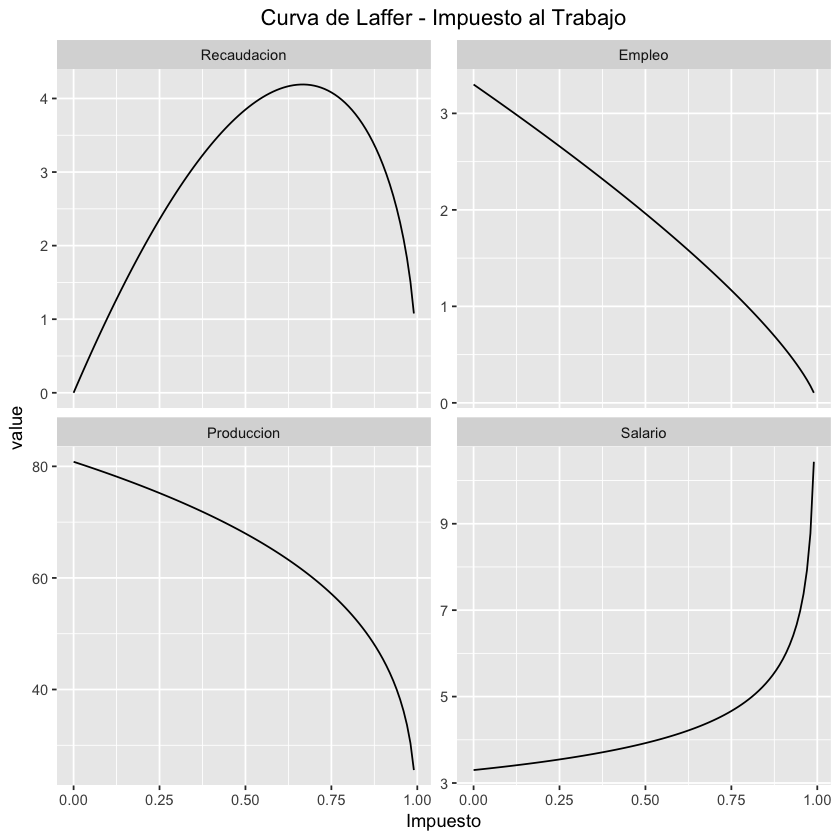

In [9]:
#Coloco la tabla en formaro flat para poder hacer el facet
tabla.flat <- melt(tabla.1, id.vars = c('Impuesto'))

#Se crea un factor para que en el gráfico aparezca el facet en el orden que yo quiero, el
#cual viene dado por la jerarquía del factor
tabla.flat$facet <- factor(tabla.flat$variable, levels = c('Recaudacion','Empleo','Produccion','Salario'))

#Las 4 tablas en un solo gráfico
lf <- ggplot(data = tabla.flat, aes(x=Impuesto, y=value)) +
  geom_line() +
  facet_wrap(~facet, scales = "free_y") +
  ggtitle("Curva de Laffer - Impuesto al Trabajo") +
  theme(plot.title = element_text(hjust = 0.5))  #Esto es para centrar el título 
lf

Observen como obtenemos una relación no monótona entre recaudación y tipo impositivo (curva de Laffer).

Asimismo podemos ver que fuerzas operan:

1. sube del tipo impositivo
1. disminuye el empleo
1. sube el salario

A partir de análisis similares pero más complejos (introducir dinámica, más impuestos, funciones de utilidad más complejas, etc.) se pueden obtener resultados muy similares a nivel cualitativo.

## Resumiendo

Las curvas de Laffer existen teóricamente y son útiles, pero empíricamente (parametrizando ejercicios más complejos con datos de economías reales) se ha demostrado que muy pocos países (concentrados en el norte de Europa) tienen capacidad de incrementar la recaudación disminuyendo los tipos:

![](https://pbs.twimg.com/media/DZoy9tEW0AAQ6uV.jpg)

Que algunos opinadores sin formalidad alguna decidan emplear la relación de Laffer como excusa para bajar tipos para incrementar la recaudación bajo cualquier circunstancia, no implica que el concepto como tal no sea válido.

